In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import math
import glob
import pickle
import statistics
import scipy.stats as stats
from sklearn.neighbors import KernelDensity
import dask
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
def getnormalizerd(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

scores = pickle.load( open( "../HIGH_OUT/scores_1D.p", "rb" ) ).set_index('Model')

In [3]:
scores['Meridional'] = getnormalizerd(scores.Meridional)
scores['Zonal'] = getnormalizerd(scores.Zonal)
scores['Pressure'] = getnormalizerd(scores.Pressure)

scores = scores.rename(columns={"Meridional": "lon","Zonal":"lat"})

#scores['sum'] = getnormalizerd(scores.lat+scores.lon)

In [4]:
scores_contour = pickle.load( open( "../HIGH_OUT/scores_2D.p", "rb" ) )
scores_contour = getnormalizerd(scores_contour.astype(float))

In [5]:
set(list(scores.index)).symmetric_difference(set(list(scores_contour.index)))

set()

In [6]:
df = scores
df['contour'] = scores_contour

In [7]:
df = df.sort_values('contour')

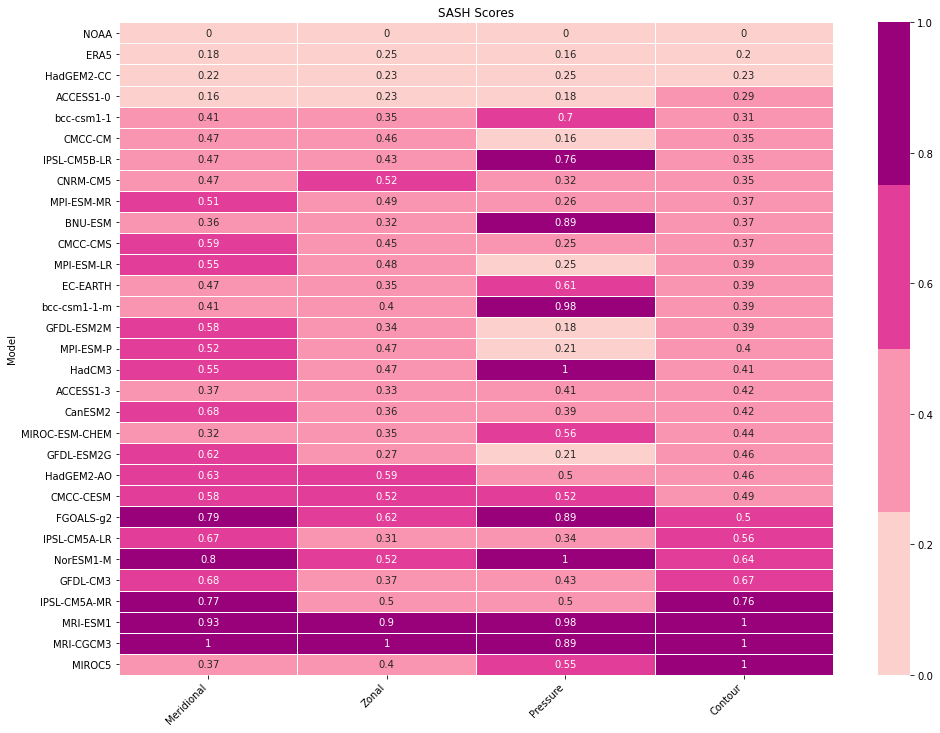

In [8]:
f, ax = plt.subplots(figsize=(16,12))
map = sns.heatmap(df.round(3),cmap=sns.color_palette("RdPu", 4), annot=True, linewidths=.5, ax=ax, xticklabels=1, yticklabels=1)
map.set_xticklabels(['Meridional','Zonal','Pressure', 'Contour'],rotation=45,horizontalalignment='right')
plt.title('SASH Scores')
plt.savefig('../HIGH_OUT/Scores_heatmap.pdf')
plt.savefig('../HIGH_OUT/Scores_heatmap.png')
plt.show()